##### Copyright 2023 The MediaPipe Authors. All Rights Reserved.

In [60]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Face Landmarks Detection with MediaPipe Tasks

This notebook shows you how to use MediaPipe Tasks Python API to detect face landmarks from images.

## Preparation

Let's start with installing MediaPipe.

In [61]:
# !pip install mediapipe

Then download the off-the-shelf model bundle(s). Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker#models) for more information about these model bundles.

In [62]:
# !wget -O face_landmarker_v2_with_blendshapes.task -q https://storage.googleapis.com/mediapipe-models/face_landmarker/face_landmarker/float16/1/face_landmarker.task

## Visualization utilities

In [99]:
#@markdown We implemented some functions to visualize the face landmark detection results. <br/> Run the following cell to activate the functions.

from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
import numpy as np
import matplotlib.pyplot as plt


def draw_landmarks_on_image(rgb_image, detection_result):
  face_landmarks_list = detection_result.face_landmarks
  annotated_image = np.copy(rgb_image)

  # Loop through the detected faces to visualize.
  for idx in range(len(face_landmarks_list)):
    face_landmarks = face_landmarks_list[idx]

    # Draw the face landmarks.
    face_landmarks_proto = landmark_pb2.NormalizedLandmarkList()
    face_landmarks_proto.landmark.extend([
      landmark_pb2.NormalizedLandmark(x=landmark.x, y=landmark.y, z=landmark.z)  for idx,landmark in enumerate(face_landmarks)
    ])

    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_TESSELATION,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_tesselation_style())
    solutions.drawing_utils.draw_landmarks(
        image=annotated_image,
        landmark_list=face_landmarks_proto,
        connections=mp.solutions.face_mesh.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp.solutions.drawing_styles
        .get_default_face_mesh_contours_style())
    # solutions.drawing_utils.draw_landmarks(
    #     image=annotated_image,
    #     landmark_list=face_landmarks_proto,
    #     connections=mp.solutions.face_mesh.FACEMESH_IRISES,
    #       landmark_drawing_spec=None,
    #       connection_drawing_spec=mp.solutions.drawing_styles
    #       .get_default_face_mesh_iris_connections_style())

  return annotated_image

def plot_face_blendshapes_bar_graph(face_blendshapes):
  # Extract the face blendshapes category names and scores.
  face_blendshapes_names = [face_blendshapes_category.category_name for face_blendshapes_category in face_blendshapes]
  face_blendshapes_scores = [face_blendshapes_category.score for face_blendshapes_category in face_blendshapes]
  # The blendshapes are ordered in decreasing score value.
  face_blendshapes_ranks = range(len(face_blendshapes_names))

  fig, ax = plt.subplots(figsize=(12, 12))
  bar = ax.barh(face_blendshapes_ranks, face_blendshapes_scores, label=[str(x) for x in face_blendshapes_ranks])
  ax.set_yticks(face_blendshapes_ranks, face_blendshapes_names)
  ax.invert_yaxis()

  # Label each bar with values
  for score, patch in zip(face_blendshapes_scores, bar.patches):
    plt.text(patch.get_x() + patch.get_width(), patch.get_y(), f"{score:.4f}", va="top")

  ax.set_xlabel('Score')
  ax.set_title("Face Blendshapes")
  plt.tight_layout()
  plt.show()

## Download test image

Let's grab a test image that we'll use later. The image is from [Unsplash](https://unsplash.com/photos/mt2fyrdXxzk).

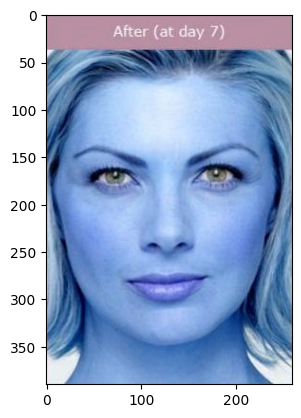

In [100]:
# !wget -q -O image.png https://storage.googleapis.com/mediapipe-assets/business-person.png

import cv2
# from google.colab.patches import cv2_imshow
url = "C:/Users/kihoon/Desktop/AI/skin_care/data_last/botox_with_bunny_line/after/image_84.jpg"
import matplotlib.pyplot as plt
img = cv2.imread(url)
plt.imshow(img)

Optionally, you can upload your own image. If you want to do so, uncomment and run the cell below.

In [65]:
# from google.colab import files
# uploaded = files.upload()

# for filename in uploaded:
#   content = uploaded[filename]
#   with open(filename, 'wb') as f:
#     f.write(content)

# if len(uploaded.keys()):
#   IMAGE_FILE = next(iter(uploaded))
#   print('Uploaded file:', IMAGE_FILE)

## Running inference and visualizing the results

Here are the steps to run face landmark detection using MediaPipe.

Check out the [MediaPipe documentation](https://developers.google.com/mediapipe/solutions/vision/face_landmarker/python) to learn more about configuration options that this task supports.


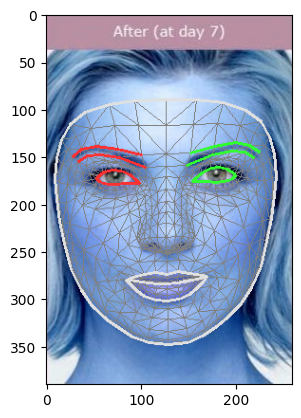

In [101]:
# STEP 1: Import the necessary modules.
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision

# STEP 2: Create an FaceLandmarker object.
base_options = python.BaseOptions(model_asset_path='./face_landmarker.task')
options = vision.FaceLandmarkerOptions(base_options=base_options,
                                       output_face_blendshapes=True,
                                       output_facial_transformation_matrixes=True,
                                       num_faces=1)
detector = vision.FaceLandmarker.create_from_options(options)

# STEP 3: Load the input image.
image = mp.Image.create_from_file(url)

# STEP 4: Detect face landmarks from the input image.
detection_result = detector.detect(image)
# detection_result.face_landmarks[0] = detection_result.face_landmarks[0][1:200]
# STEP 5: Process the detection result. In this case, visualize it.
annotated_image = draw_landmarks_on_image(image.numpy_view(), detection_result)
plt.imshow(cv2.cvtColor(annotated_image, cv2.COLOR_RGB2BGR))

In [104]:
detection_result.face_landmarks[0][]

[NormalizedLandmark(x=0.491486132144928, y=0.704806923866272, z=-0.07800522446632385, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.49016574025154114, y=0.628413736820221, z=-0.2087065875530243, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.49102526903152466, y=0.6482118964195251, z=-0.09498091787099838, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4569220244884491, y=0.5385653972625732, z=-0.17887473106384277, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4897107481956482, y=0.6030651926994324, z=-0.22876809537410736, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4891104996204376, y=0.566469669342041, z=-0.22198344767093658, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.4889463484287262, y=0.4739282727241516, z=-0.14228779077529907, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.21974655985832214, y=0.45211753249168396, z=0.01595117710530758, visibility=0.0, presence=0.0),
 NormalizedLandmark(x=0.48780497908592224, y=0.410

In [103]:
detection_result.face_blendshapes

[[Category(index=0, score=1.5057963764775195e-06, display_name='', category_name='_neutral'),
  Category(index=1, score=0.037930987775325775, display_name='', category_name='browDownLeft'),
  Category(index=2, score=0.051528602838516235, display_name='', category_name='browDownRight'),
  Category(index=3, score=0.00044775247806683183, display_name='', category_name='browInnerUp'),
  Category(index=4, score=0.08860157430171967, display_name='', category_name='browOuterUpLeft'),
  Category(index=5, score=0.04332347214221954, display_name='', category_name='browOuterUpRight'),
  Category(index=6, score=2.1270216166158207e-05, display_name='', category_name='cheekPuff'),
  Category(index=7, score=9.696789504687331e-08, display_name='', category_name='cheekSquintLeft'),
  Category(index=8, score=2.2689386014462798e-07, display_name='', category_name='cheekSquintRight'),
  Category(index=9, score=0.08906634896993637, display_name='', category_name='eyeBlinkLeft'),
  Category(index=10, score=

We will also visualize the face blendshapes categories using a bar graph.

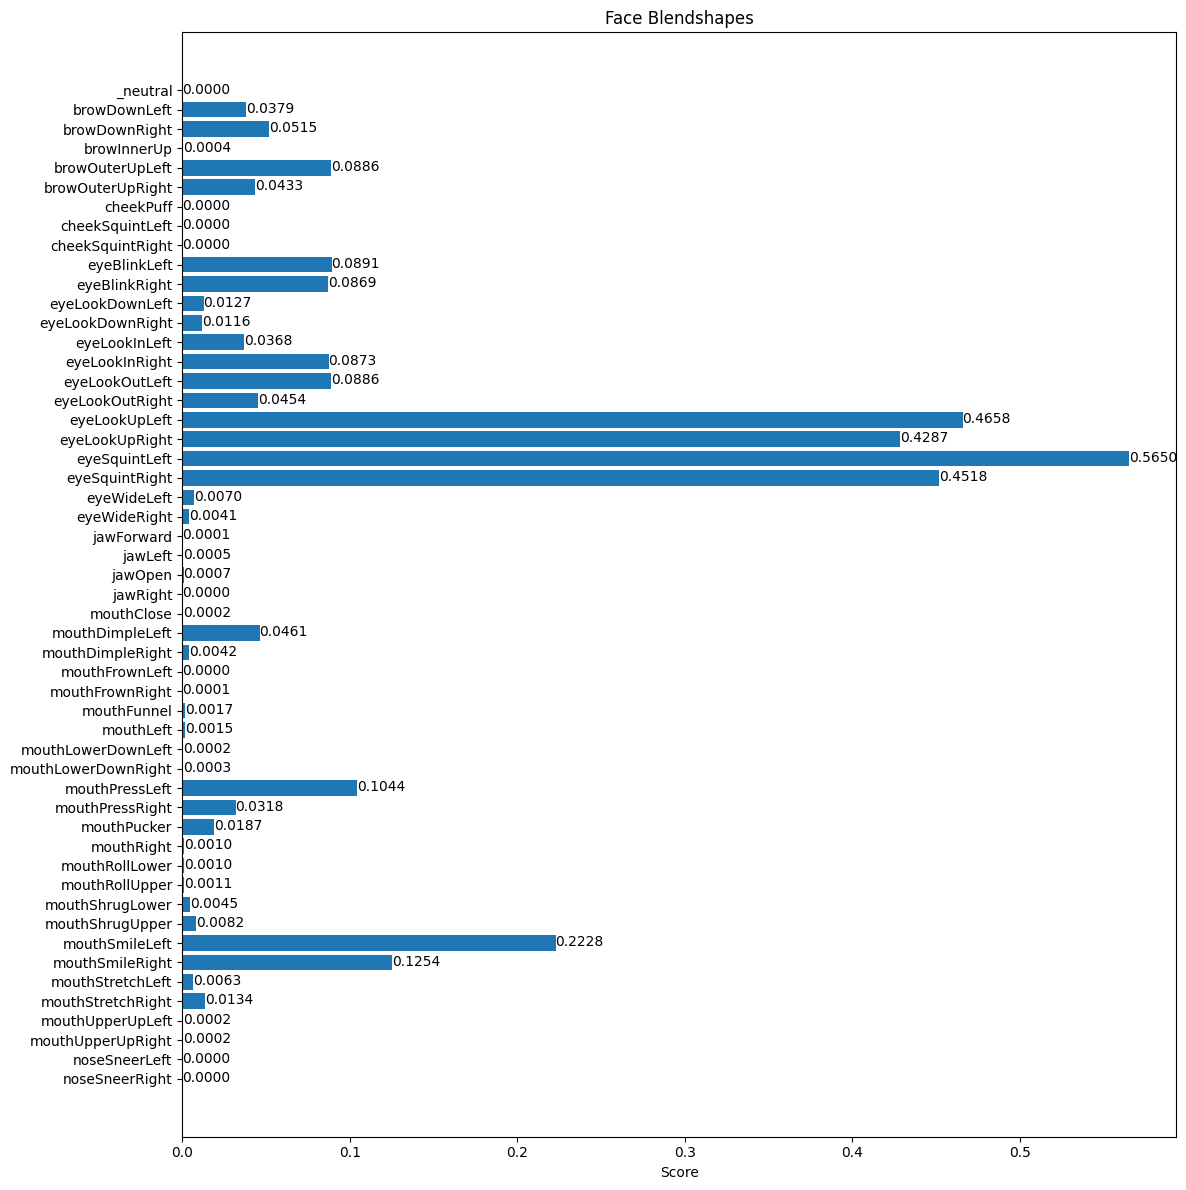

In [68]:
plot_face_blendshapes_bar_graph(detection_result.face_blendshapes[0])

And print the transformation matrix.

In [69]:
print(detection_result.facial_transformation_matrixes)

[array([[ 9.99913037e-01, -1.11763440e-02,  7.02842278e-03,
        -1.87032819e-01],
       [ 1.21718394e-02,  9.86579657e-01, -1.62826791e-01,
        -7.21356630e-01],
       [-5.11428714e-03,  1.62898093e-01,  9.86629903e-01,
        -2.24257851e+01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00]])]
